# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

Observations of plots:
As you move toward the equator the city temperature becomes hotter. 
There is no observed relationship between city latitude and cloudiness.
There is no observed relationship between vity latitude and wind speed.


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

612

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Create the url
base_url = "http://api.openweathermap.org/data/2.5/weather?units=imperial&appid=861c2de183134db52f936a4ac48e3ff8"


# Counters
city_counter = 1
set_counter = 1

# Create the lists 
cities_list= []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

print("Starting Retrieval")

# Create a query url for each city 
for i, city in enumerate(cities):
    
    # Group the cities
    if (i % 50 == 0 and i >= 50):
        set_counter += 1
        city_counter = 1
         
    # Create API url
    query_url = base_url +"&q=" + city
    
    # Get json respose
    response = requests.get(query_url).json()
    
    # Print results 
    print(f"Processing Record {city_counter} of Set {set_counter} | {city}")
    
    # Increase city counter
    city_counter += 1
    
   # Add values to lists
    try:       
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        max_temp.append(response["main"]["temp_max"])
        wind_speed.append(response["wind"]["speed"])
        cities_list.append(response["name"])
    except:
        print("City not found. Skipping...")
        pass
        
print("Retrieval Completed")

Starting Retrieval
Processing Record 1 of Set 1 | carnarvon
Processing Record 2 of Set 1 | mackenzie
Processing Record 3 of Set 1 | thompson
Processing Record 4 of Set 1 | cairns
Processing Record 5 of Set 1 | ushuaia
Processing Record 6 of Set 1 | albany
Processing Record 7 of Set 1 | punta arenas
Processing Record 8 of Set 1 | lagoa
Processing Record 9 of Set 1 | burica
City not found. Skipping...
Processing Record 10 of Set 1 | new norfolk
Processing Record 11 of Set 1 | hay river
Processing Record 12 of Set 1 | upernavik
Processing Record 13 of Set 1 | ancud
Processing Record 14 of Set 1 | cherskiy
Processing Record 15 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 16 of Set 1 | busselton
Processing Record 17 of Set 1 | saint-philippe
Processing Record 18 of Set 1 | celestun
Processing Record 19 of Set 1 | klaksvik
Processing Record 20 of Set 1 | tuatapere
Processing Record 21 of Set 1 | hermanus
Processing Record 22 of Set 1 | illoqqortoormiut
City not found.

Processing Record 36 of Set 4 | fortuna
Processing Record 37 of Set 4 | tahoua
Processing Record 38 of Set 4 | fuling
Processing Record 39 of Set 4 | iisalmi
Processing Record 40 of Set 4 | kawalu
Processing Record 41 of Set 4 | araouane
Processing Record 42 of Set 4 | yuzhno-yeniseyskiy
City not found. Skipping...
Processing Record 43 of Set 4 | bambanglipuro
Processing Record 44 of Set 4 | bengkulu
Processing Record 45 of Set 4 | mbeya
Processing Record 46 of Set 4 | kosh-agach
Processing Record 47 of Set 4 | nizhniy kuranakh
Processing Record 48 of Set 4 | tiksi
Processing Record 49 of Set 4 | codrington
Processing Record 50 of Set 4 | barmer
Processing Record 1 of Set 5 | hobyo
Processing Record 2 of Set 5 | de-kastri
Processing Record 3 of Set 5 | ola
Processing Record 4 of Set 5 | sao joao da barra
Processing Record 5 of Set 5 | kahului
Processing Record 6 of Set 5 | mola di bari
Processing Record 7 of Set 5 | bambous virieux
Processing Record 8 of Set 5 | cidreira
Processing Rec

Processing Record 26 of Set 8 | tsihombe
City not found. Skipping...
Processing Record 27 of Set 8 | wukari
Processing Record 28 of Set 8 | nouadhibou
Processing Record 29 of Set 8 | linxia
Processing Record 30 of Set 8 | zhigansk
Processing Record 31 of Set 8 | ust-kuyga
Processing Record 32 of Set 8 | la libertad
Processing Record 33 of Set 8 | sampit
Processing Record 34 of Set 8 | kerrville
Processing Record 35 of Set 8 | gimli
Processing Record 36 of Set 8 | ilulissat
Processing Record 37 of Set 8 | kamenka
Processing Record 38 of Set 8 | abu samrah
Processing Record 39 of Set 8 | coquimbo
Processing Record 40 of Set 8 | bodden town
Processing Record 41 of Set 8 | buraydah
Processing Record 42 of Set 8 | boatlaname
City not found. Skipping...
Processing Record 43 of Set 8 | ixtapa
Processing Record 44 of Set 8 | broken hill
Processing Record 45 of Set 8 | sterling
Processing Record 46 of Set 8 | pareora
Processing Record 47 of Set 8 | bira
Processing Record 48 of Set 8 | luanda
Pr

Processing Record 16 of Set 12 | yumen
Processing Record 17 of Set 12 | canico
Processing Record 18 of Set 12 | kerema
Processing Record 19 of Set 12 | panama city
Processing Record 20 of Set 12 | porto belo
Processing Record 21 of Set 12 | mozhga
Processing Record 22 of Set 12 | lavrentiya
Processing Record 23 of Set 12 | luderitz
Processing Record 24 of Set 12 | keelung
Processing Record 25 of Set 12 | vallenar
Processing Record 26 of Set 12 | karaul
City not found. Skipping...
Processing Record 27 of Set 12 | whitehorse
Processing Record 28 of Set 12 | ranong
Processing Record 29 of Set 12 | ginir
Processing Record 30 of Set 12 | utete
Processing Record 31 of Set 12 | lusambo
Processing Record 32 of Set 12 | jacareacanga
Processing Record 33 of Set 12 | huanuni
Processing Record 34 of Set 12 | banjar
Processing Record 35 of Set 12 | kamphaeng phet
Processing Record 36 of Set 12 | mnogovershinnyy
Processing Record 37 of Set 12 | doha
Processing Record 38 of Set 12 | afmadu
City not f

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
# Create df
weather_dict = pd.DataFrame({ 
     "City": cities_list,
     "Cloudiness": cloudiness,
     "Country": country,
     "Date": date,
     "Humidity": humidity,
     "Lat": lat,
     "Lng": lng,
     "Max Temp": max_temp,
     "Wind Speed": wind_speed    
})


In [6]:
# Count data
weather_dict.count()

City          577
Cloudiness    577
Country       577
Date          577
Humidity      577
Lat           577
Lng           577
Max Temp      577
Wind Speed    577
dtype: int64

In [7]:
# Display df
weather_dict

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Bestöbe,50,KZ,1604879031,76,52.50,73.10,37.26,25.99
1,Katherine,59,AU,1604879031,58,-14.47,132.27,87.80,9.17
2,Ushuaia,40,AR,1604878567,78,-54.80,-68.30,44.60,26.40
3,Punta Arenas,0,CL,1604879031,70,-53.15,-70.92,44.60,18.34
4,Ribeira Grande,56,PT,1604879031,59,38.52,-28.70,61.18,8.99
...,...,...,...,...,...,...,...,...,...
572,Luga,0,RU,1604879090,89,58.74,29.85,34.75,6.15
573,Vila,54,PT,1604878930,93,42.03,-8.16,53.01,4.74
574,Vestmannaeyjar,97,IS,1604878967,81,63.44,-20.27,44.53,25.57
575,Fuerte Olimpo,89,PY,1604879091,31,-21.04,-57.87,89.20,5.19


In [9]:
# Save to csv file
weather_dict.to_csv("output_data/city_data_export.csv", index = False)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [11]:
#  Get cities that have humidity over 100%.
city_data_hum = weather_dict[(weather_dict["Humidity"] > 100)].index
                                  
city_data_hum

Int64Index([], dtype='int64')

In [12]:
# Make df equal to the city data to drop all humidity outliers by index.
clean_city_data = weather_dict.drop(city_data_hum, inplace=False)
clean_city_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Bestöbe,50,KZ,1604879031,76,52.50,73.10,37.26,25.99
1,Katherine,59,AU,1604879031,58,-14.47,132.27,87.80,9.17
2,Ushuaia,40,AR,1604878567,78,-54.80,-68.30,44.60,26.40
3,Punta Arenas,0,CL,1604879031,70,-53.15,-70.92,44.60,18.34
4,Ribeira Grande,56,PT,1604879031,59,38.52,-28.70,61.18,8.99


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

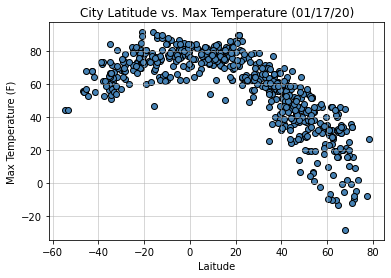

In [16]:
# Create Latitude vs. Temperature Plot scatter plot
plt.scatter(weather_dict["Lat"], weather_dict["Max Temp"], facecolor = "steelblue", edgecolor = "black")

# Set title
plt.title("City Latitude vs. Max Temperature (01/17/20)")

# Set x axis label
plt.xlabel("Laitude")

# Set y axis label
plt.ylabel("Max Temperature (F)")

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save fig
plt.savefig("../Images/City Latitude vs Max Temperature.png")

## Latitude vs. Humidity Plot

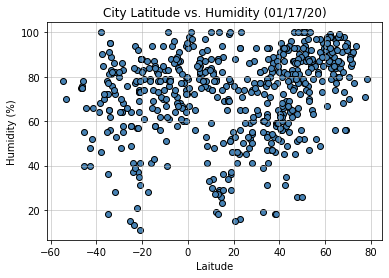

In [17]:
# Create Latitude vs. Humidity Plot scatter plot
plt.scatter(weather_dict["Lat"], weather_dict["Humidity"], facecolor = "steelblue", edgecolor = "black")

# Set title
plt.title("City Latitude vs. Humidity (01/17/20)")

# Set x axis label
plt.xlabel("Laitude")

# Set y axis label
plt.ylabel("Humidity (%)")

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save fig
plt.savefig("../Images/City Latitude vs Humidity.png")

## Latitude vs. Cloudiness Plot

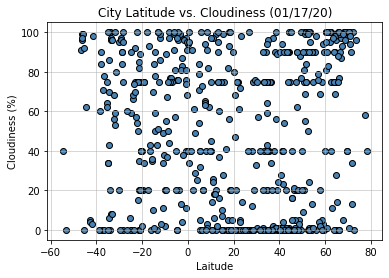

In [18]:
# Create Latitude vs. Cloudiness Plot scatter plot
plt.scatter(weather_dict["Lat"], weather_dict["Cloudiness"], facecolor = "steelblue", edgecolor = "black")

# Set title
plt.title("City Latitude vs. Cloudiness (01/17/20)")

# Set x axis label
plt.xlabel("Laitude")

# Set y axis label
plt.ylabel("Cloudiness (%)")

# Set y axis limit
plt.ylim(-5,105)

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save fig
plt.savefig("../Images/City Latitude vs Cloudiness.png")

## Latitude vs. Wind Speed Plot

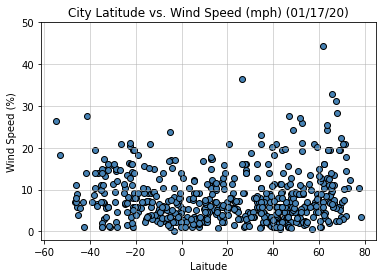

In [19]:
# Create Latitude vs. Wind Speed scatter plot
plt.scatter(weather_dict["Lat"], weather_dict["Wind Speed"], facecolor = "steelblue", edgecolor = "black")
plt.title("City Latitude vs. Wind Speed (mph) (01/17/20)")

# Set x axis label
plt.xlabel("Laitude")

# Set y axis label
plt.ylabel("Wind Speed (%)")

# Set y axis limit
plt.ylim(-2,50)

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save fig
plt.savefig("../Images/City Latitude vs Wind Speed (mph).png")

## Linear Regression

In [26]:
# Create Northern and Southern Hemisphere DataFrames
northern_hemisphere = weather_dict.loc[weather_dict["Lat"] >= 0]
southern_hemisphere = weather_dict.loc[weather_dict["Lat"] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [27]:
# Define function for creating linear agression and scatter plot
def linear_agression(x,y):
    print(f"The r-squared is : {round(st.pearsonr(x, y)[0],2)}")
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x, y)
    plt.plot(x,regress_values,"r-")
    return line_eq

# Define a fuction for annotating
def annotate(line_eq, a, b):
    plt.annotate(line_eq,(a,b),fontsize=15,color="red")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is : 0.63


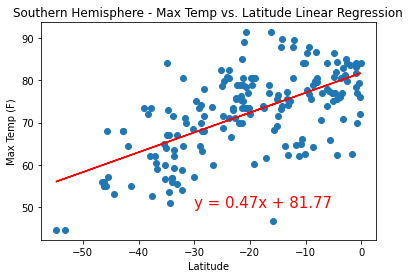

In [28]:
# Call an function #1
equation = linear_agression(southern_hemisphere["Lat"],southern_hemisphere["Max Temp"])

# Call an function #2
annotate(equation, -30, 50)

# Set a title
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Max Temp (F)")

# Save fig
plt.savefig("../Images/Southern Hemisphere - Max Temp vs. Latitude Linear Regression.png")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is : 0.33


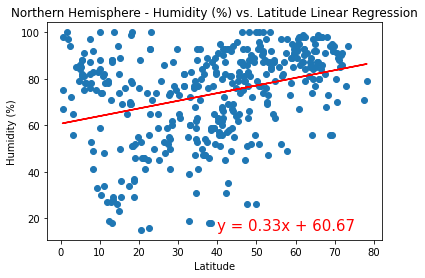

In [29]:
# Call an function #1
equation = linear_agression(northern_hemisphere["Lat"], northern_hemisphere["Humidity"])

# Call an function #2
annotate(equation, 40, 15)

# Set a title
plt.title("Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Humidity (%)")

# Save fig
plt.savefig("../Images/Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is : 0.19


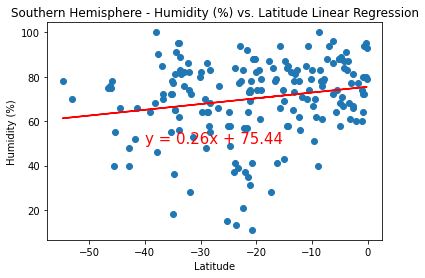

In [30]:
# Call an function #1
equation = linear_agression(southern_hemisphere["Lat"], southern_hemisphere["Humidity"])

# Call an function #2
annotate(equation, -40, 50)

# Set title
plt.title("Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Humidity (%)")

# Save fig
plt.savefig("../Images/Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is : 0.2


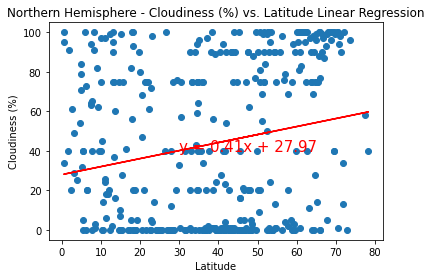

In [31]:
# Call an function #1
equation = linear_agression(northern_hemisphere["Lat"], northern_hemisphere["Cloudiness"])

# Call an function #2
annotate(equation, 30, 40)

# Set a title
plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Cloudiness (%)")

# Save fig
plt.savefig("../Images/Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is : 0.09


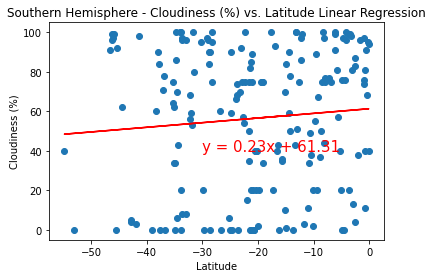

In [32]:
# Call an function #1
equation = linear_agression(southern_hemisphere["Lat"], southern_hemisphere["Cloudiness"])

# Call an function #2
annotate(equation, -30, 40)

# Set a title
plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Cloudiness (%)")

# Save fig
plt.savefig("../Images/Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is : 0.2


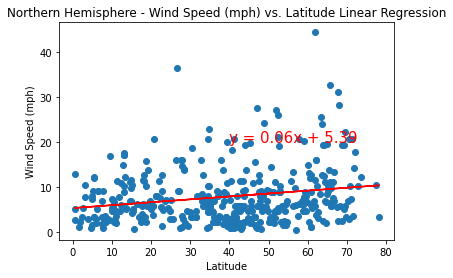

In [33]:
# Call an function #1
equation = linear_agression(northern_hemisphere["Lat"], northern_hemisphere["Wind Speed"])

# Call an function #2
annotate(equation, 40, 20)

# Set  title
plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Wind Speed (mph)")

# Save fig
plt.savefig("../Images/Northern Hemisphere - Wind Speed vs. Latitude Linear Regression.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is : -0.25


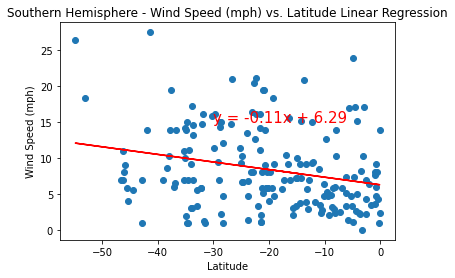

In [34]:
# Call an function #1
equation = linear_agression(southern_hemisphere["Lat"], southern_hemisphere["Wind Speed"])

# Call an function #2
annotate(equation, -30, 15)

# Set  title
plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Wind Speed (mph)")

# Save fig
plt.savefig("../Images/Southern Hemisphere - Wind Speed vs. Latitude Linear Regression.png")